In [2]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\Administrator\Desktop\Exploratory Data Analysis\Diabeties Prediction EDA\Diabeties-EDA\dataset\pima-indians-diabetes.csv",
    header=None
)


df.columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]


print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())


Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
import numpy as np

zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[zero_invalid] = df[zero_invalid].replace(0, np.nan)

print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [4]:
df.fillna(df.median(numeric_only=True), inplace=True)

print("Any missing values left?", df.isnull().sum().any())


Any missing values left? False


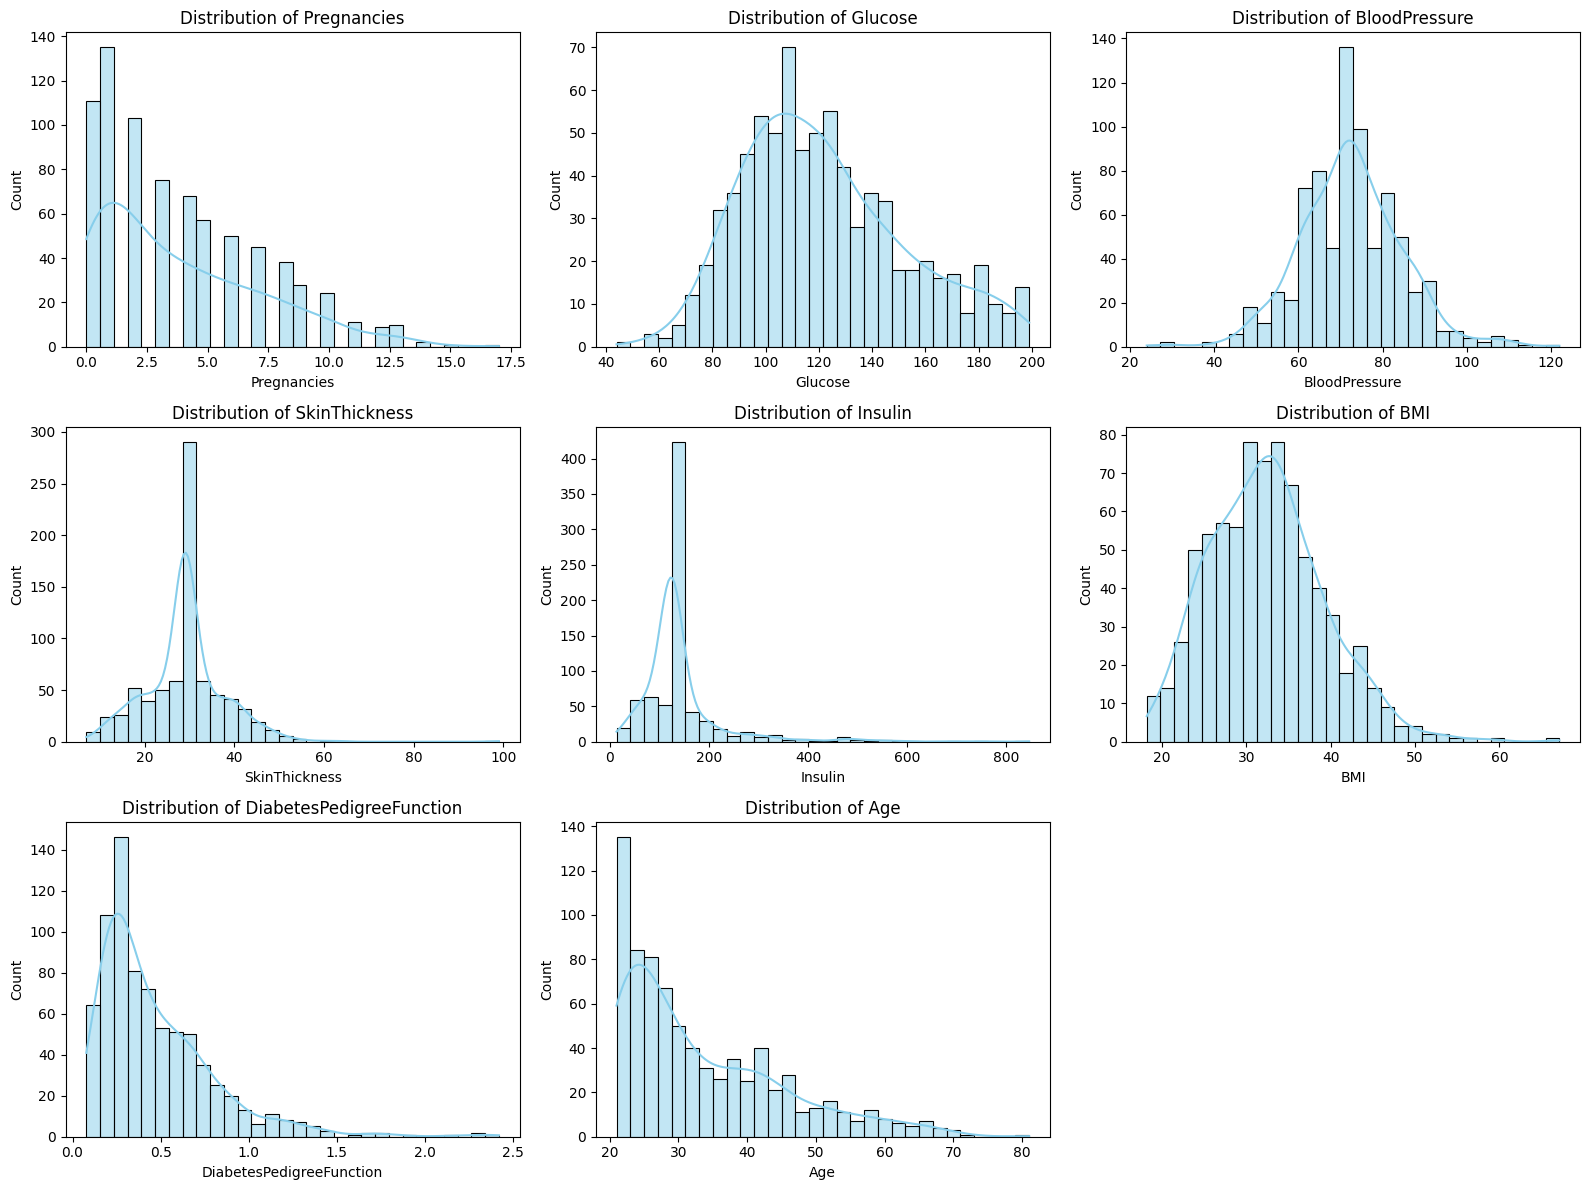

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5596\3231161301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


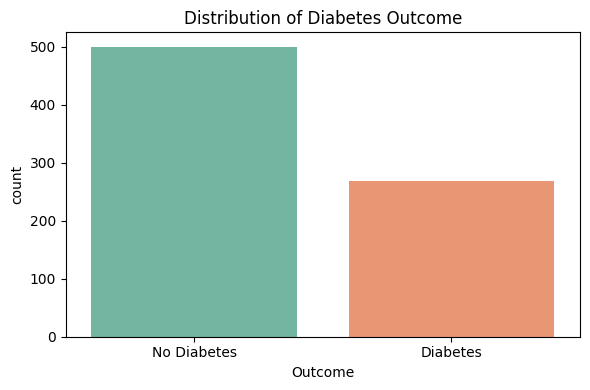

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5596\3231161301.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set3')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5596\3231161301.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set3')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5596\3231161301.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set3')
C:\Users\Administrator\AppData\Local\Temp\ipykern

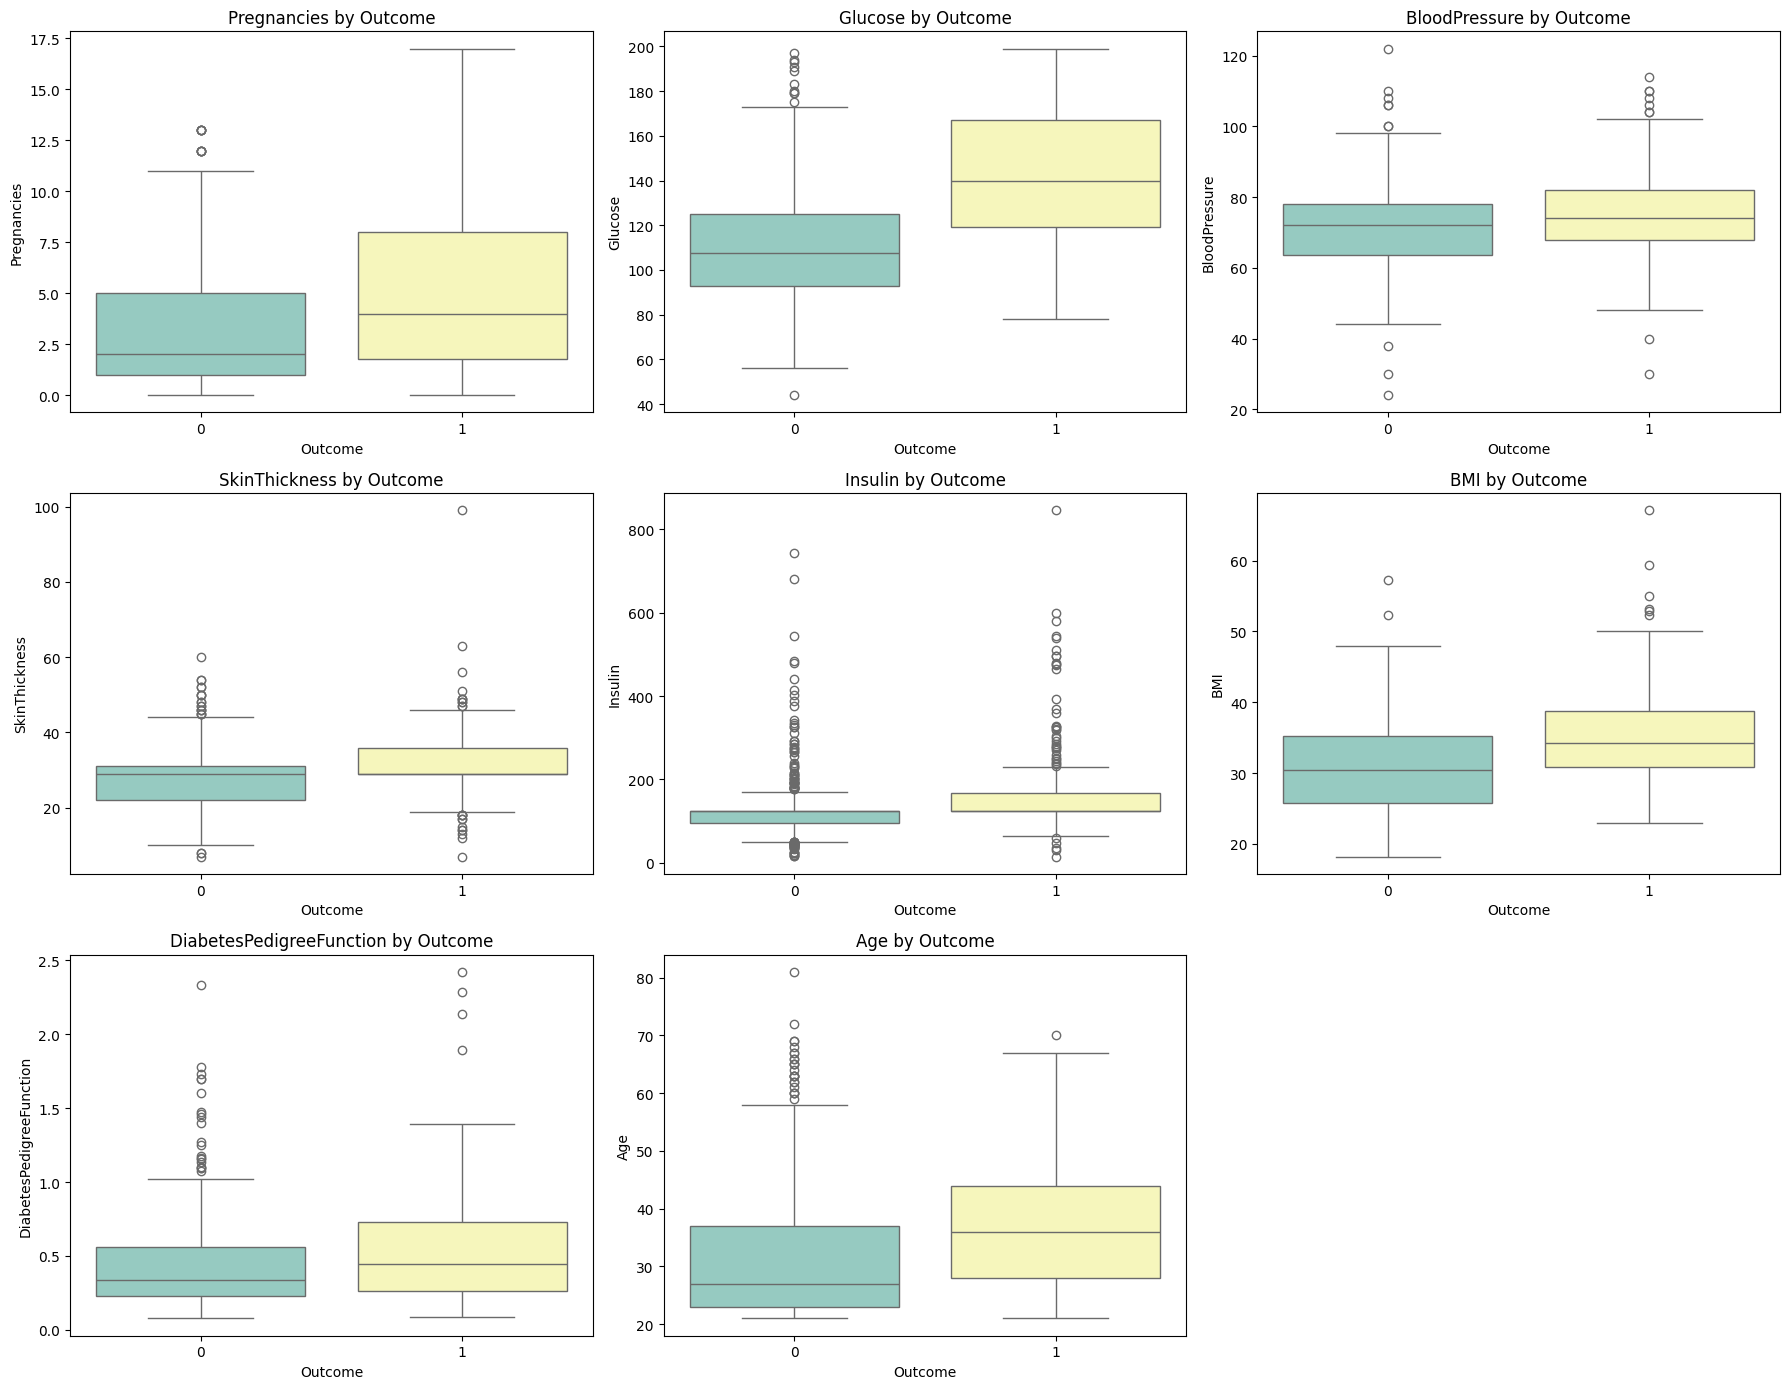

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Distribution of Diabetes Outcome')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 14))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=col, data=df, palette='Set3')
    plt.title(f'{col} by Outcome')
plt.tight_layout()
plt.show()


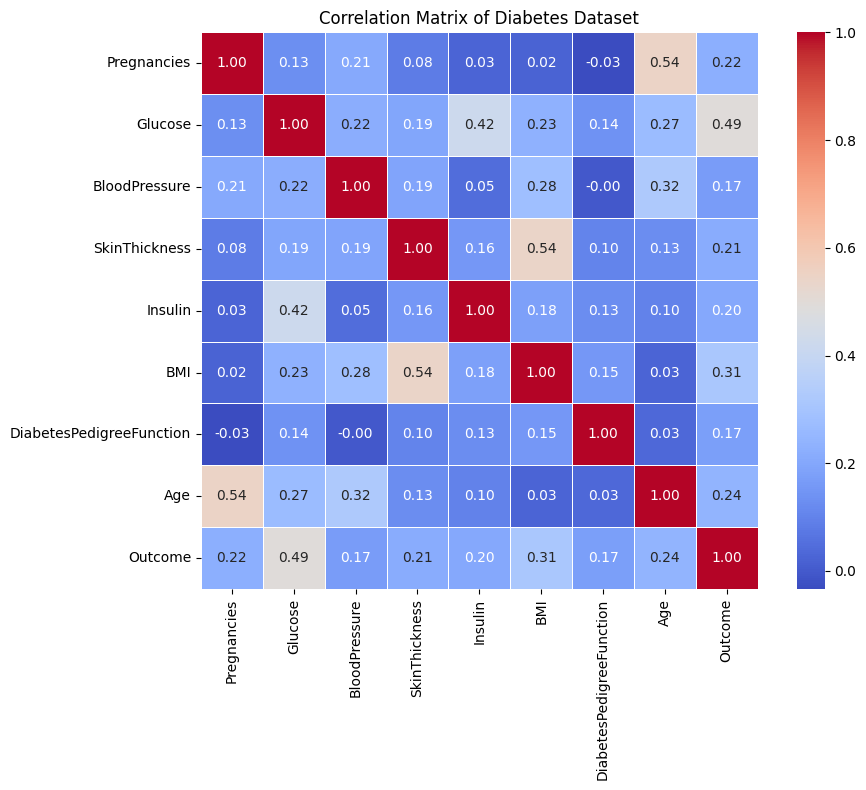

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
corr = df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Diabetes Dataset')
plt.tight_layout()
plt.show()
